In [1]:
# Import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session,sessionmaker
from sqlalchemy import create_engine, inspect,func

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
# map measurement class
Measurement = Base.classes.measurement

In [5]:
# map station class
Station = Base.classes.station

In [6]:
# create a session
Session = sessionmaker(bind=engine)
session = Session()

In [7]:
# precipitation analysis
date_prcp = engine.execute('SELECT date,prcp FROM measurement').fetchall()

In [8]:
# quering prcp values for 365 days before today
prev = dt.date.today() - dt.timedelta(days=365)
query = session.query(Measurement.date,func.sum(Measurement.prcp)).filter(Measurement.date >= prev).group_by(Measurement.date).order_by(Measurement.date).all()
    
          
           


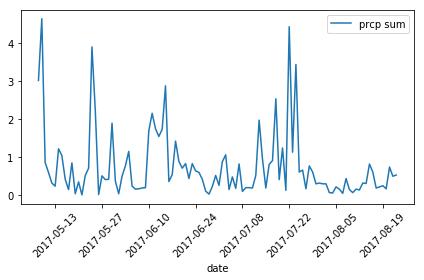

In [9]:
df = pd.DataFrame(query, columns=['date', 'prcp sum'])
df.set_index(df['date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x_compat=True)

# Rotate the xticks for the dates
plt.xticks(rotation='45')
plt.tight_layout()
plt.show()

In [10]:
# summary statistics for the precipitation data
df.describe()

,prcp sum
count,108.000000
mean,0.757729
std,0.901677
min,0.010000
25%,0.197661
50%,0.460965
75%,0.852500
max,4.630000


In [17]:
# station analysis
# count the total number of stations
total_station = session.query(func.count(Station.id)).all()
total_station

[(9)]

In [18]:
# Design a query to find the most active stations
active_stations = engine.execute('''select station,count(id) as count from measurement
group by station
order by count desc''').fetchall()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# station that had the highest number of observations
station_high = active_stations[0][0]
station_high

'USC00519281'

In [36]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs)
query_tobs = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= prev).filter(Measurement.station == station_high).order_by(Measurement.date).all()

In [30]:
tobs_df = pd.DataFrame(query_tobs)
tobs_df.head()

,date,tobs
0,2017-05-08,70.0
1,2017-05-09,67.0
2,2017-05-10,74.0
3,2017-05-11,70.0
4,2017-05-12,75.0


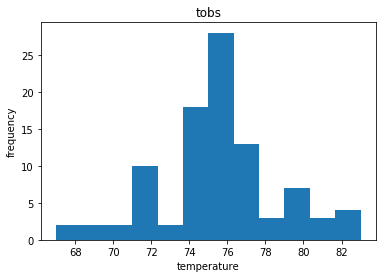

In [35]:
# Plot the results as a histogram with bins=12
tobs_df.hist('tobs',bins=12,grid=False)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.show()

In [49]:
# Temperature analysis
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and 
#return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date,end_date):
    temp_range = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    temp_range_df = pd.DataFrame(temp_range)
    return temp_range_df.tobs.min(),temp_range_df.tobs.mean(),temp_range_df.tobs.max()
minimum,average,maximum = calc_temps('2017-05-08','2017-05-20')


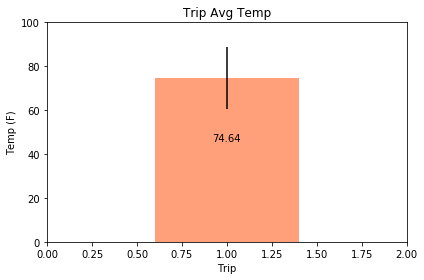

In [52]:
# Plot the min, avg, and max temperature from your previous query as a bar chart
fig, ax = plt.subplots()
bar_chart = ax.bar(1 , average, color= 'lightsalmon', yerr=maximum-minimum)
ax.set_xlabel("Trip")
ax.set_ylabel("Temp (F)")
ax.set_title("Trip Avg Temp")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
# label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()